<a href="https://colab.research.google.com/github/hernanmartinezrivero/Machine-Learning-Tips/blob/main/03_Varias_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2024**

---

# Varias Variables

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

#seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url ='https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,NaN,No,No recibo bono,...,Completo,Licenciatura en Sistemas de Información,Universidad Siglo 21,Terminar encuesta,NaN,NaN,NaN,NaN,45,Varón Cis
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis


# Variables Categóricas


Hay algunas variables que han sido rellenadas con texto, wque hay que interpretar o son inútiles. En el 2022, la variable género tenia varias categorías que podian ser unidas en varon_cis o mujer_cis y diversidades. En el 2023, explotó el trolleo y el resultado es absurdo

In [ ]:
df.profile_gender.unique()

array(['Varón Cis', 'Mujer Cis', 'Hombre', 'Prefiero no decir', 'normal',
       'Varon', 'Agénero', 'Masculino', 'Dolarsexual', '.', 'Queer',
       'Mujer Trans', 'No binarie',
       'BIEN MACHO Y PORONGUDO. QUE CLASE DE OPCIONES DE MIERDA SON ESTAS?',
       'no entiendo por que la hacen tan dificil. que es eso de cis? soy heterosexual.',
       'Hombre..... tipo normal', 'Cis', 'varon, no se que es varon cis',
       'Dejen de preguntar boludeces', 'Normal', 'que pelotudos eh',
       'hombre', 'Helicoptero de ataque apache', 'Varón Trans',
       'Varoo natural', 'Varón', 'Bigénero', 'Mujer', 'Transformer',
       'Fluido', 'masculino', 'Hombre, macho silencioso', 'varón',
       'no compliquemos lo simple', 'Agenero, presentación mujer cis',
       'Me considero perteneciente al genero de los que no se identifican con ningun genero',
       'Macho', 'Porque tantas opciones? Solo hay 2. Soy hombre.',
       'heterosexual', 'Machote', 'Puto', 'Gris', 'Heterosexual',
       'Hombre

In [ ]:
df.loc[:,'profile_g'] = df.profile_gender.replace({'Varón Cis': 'Varón cis','Mujer': 'Mujer cis','Mujer Cis': 'Mujer cis','Femenino': 'Mujer cis','mujer': 'Mujer cis','Mujer':'Mujer cis','Queer':'Diversidades','Varón Trans':'Diversidades','No binarie':'Diversidades','Mujer Trans':'Diversidades','Fluido':'Diversidades','Bigénero':'Diversidades','Gay':'Diversidades'}).fillna(False)

In [ ]:
filtered_df= df[df[salary_col] < 2000000]
df_H= filtered_df[ filtered_df['profile_g']=='Varón cis']
df_M=filtered_df[ filtered_df['profile_g']=='Mujer cis']

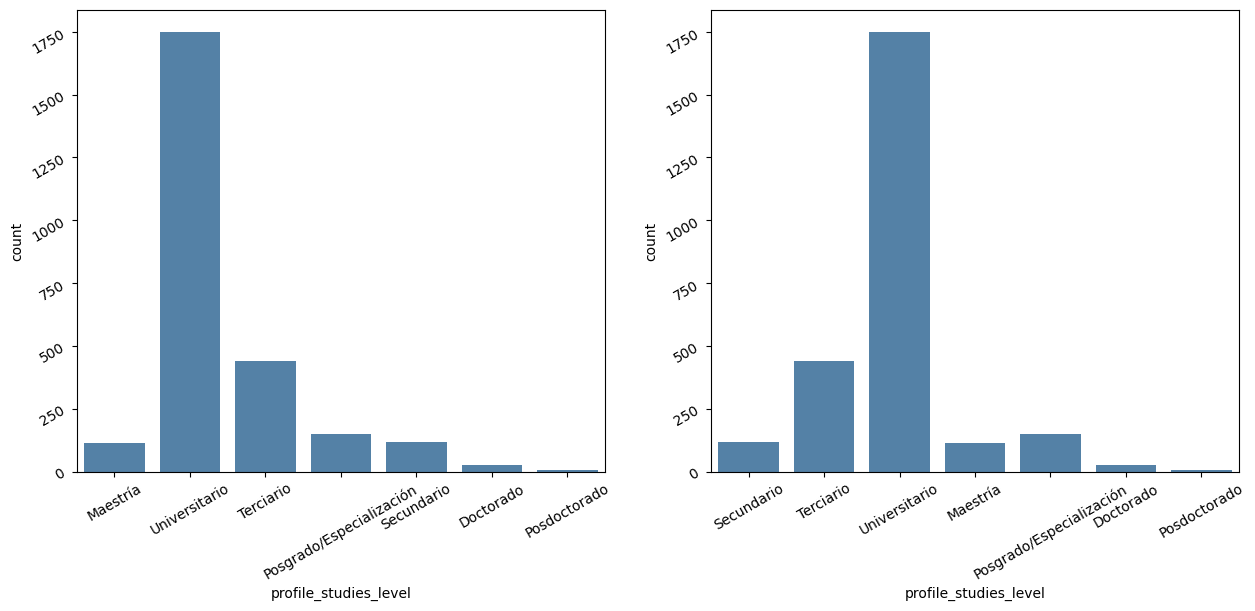

In [ ]:
sorted_studies_levels = ['Secundario', 'Terciario', 'Universitario',
                         'Maestría','Posgrado/Especialización', 'Doctorado', 'Posdoctorado']#lista de los nombres de categorías ordenadas
fig, axes = plt.subplots(ncols=2, figsize=(15,6)) #se genera la figura, se divide en dos lugares y se define su tamaño
g = seaborn.countplot(x= df.profile_studies_level.dropna(), color='steelblue', ax=axes[0]) #gráfico de conteos (en el lugar 0)
g = seaborn.countplot(x= df.profile_studies_level.dropna(), color='steelblue', ax=axes[1], #gráfico de conteos ordenado (en el lugar 1)
                  order=sorted_studies_levels)
for ax in axes:
  ax.tick_params(labelrotation=30) # en cada lugar (ax in axes) se rota la etiqueta

# Variables Numéricas


In [ ]:
salary_col='salary_monthly_BRUTO' #defino variable con el nombre de la columna de interés
#salary_col='salary_monthly_NETO'

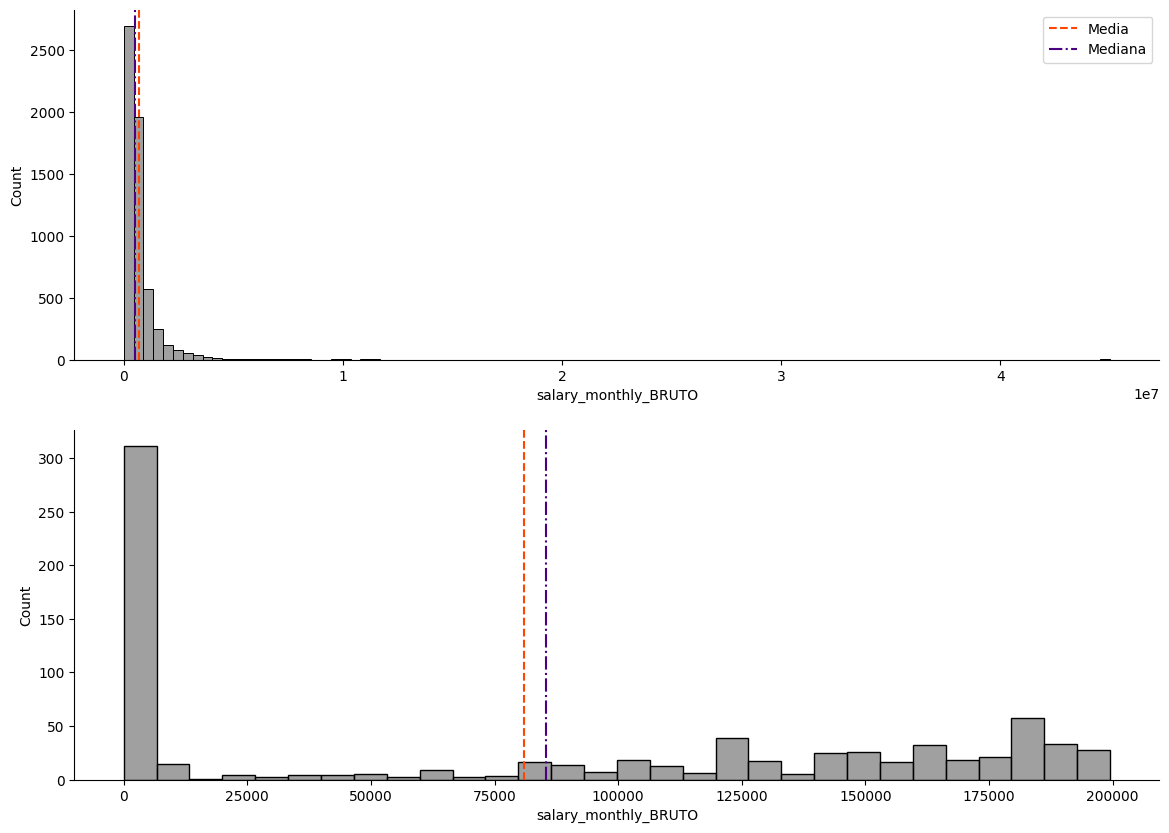

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(14, 10)) #se genera la figura, se divide en dos lugares y se define su tamaño

seaborn.histplot(df[salary_col], bins=100, ax=axes[0], color='gray') #Histograma con 100 bins
axes[0].axvline(df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

filtered_df = df[df[salary_col] < 200000]
seaborn.histplot(filtered_df[salary_col], bins=30, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

In [ ]:
print(df[salary_col][:4])
print(type(df[salary_col]))

0    680000.0
1    650000.0
2    125000.0
3    190000.0
Name: salary_monthly_BRUTO, dtype: float64
<class 'pandas.core.series.Series'>


#Varias Variables



## Varias Categóricas

In [ ]:
## Tabla de contingencia
pd.crosstab(df.work_province, df.profile_studies_level)#, normalize=True) #no están ordenados
pd.crosstab(df.work_province, df.profile_studies_level)[sorted_studies_levels]#ordenados

profile_studies_level,Secundario,Terciario,Universitario,Maestría,Posgrado/Especialización,Doctorado,Posdoctorado
work_province,,,,,,,
Catamarca,0,0,0,1,0,0,0
Chaco,1,2,17,1,1,0,0
Chubut,2,2,12,0,0,1,0
Ciudad Autónoma de Buenos Aires,57,208,840,63,76,13,2
Corrientes,0,2,21,1,1,0,0
Córdoba,12,40,172,11,15,6,1
Entre Ríos,1,2,21,3,1,0,0
Formosa,0,0,0,0,1,0,0
Jujuy,0,0,7,0,2,0,0


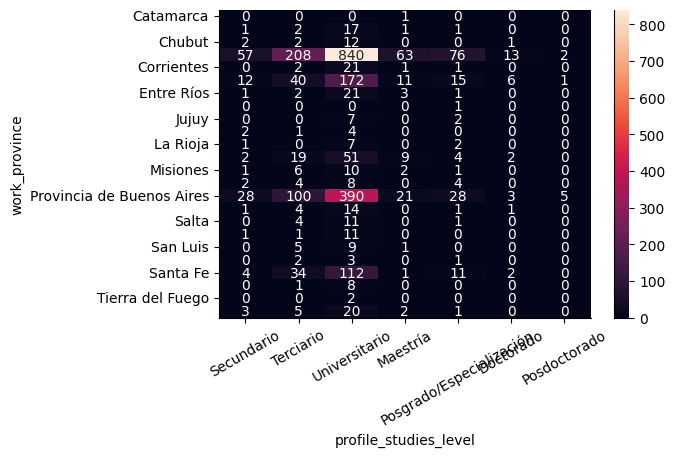

In [ ]:
fig = plt.figure(figsize=(6,4))
exp = pd.crosstab(df.work_province,
                  df.profile_studies_level)[sorted_studies_levels]
seaborn.heatmap(exp, annot=True, fmt='g')
plt.xticks(rotation=30)
plt.yticks(rotation=0)
seaborn.despine()

In [ ]:
## Tabla de contingencia normalizada, la suma de los valores da 1, son proporciones, estima probabilidad
pd.crosstab(df.profile_age, df.profile_studies_level, normalize=True)[sorted_studies_levels]

profile_studies_level,Secundario,Terciario,Universitario,Maestría,Posgrado/Especialización,Doctorado,Posdoctorado
profile_age,,,,,,,
18,0.000383,0.000000,0.000000,0.000000,0.000383,0.000000,0.000000
19,0.000383,0.000383,0.002296,0.000000,0.000000,0.000000,0.000000
20,0.001148,0.000765,0.003827,0.000000,0.000000,0.000000,0.000000
21,0.000765,0.001914,0.007654,0.000000,0.000000,0.000000,0.000000
22,0.001914,0.003827,0.018752,0.000000,0.000000,0.000000,0.000000
23,0.001531,0.004975,0.024493,0.000000,0.000000,0.000000,0.000000
24,0.001531,0.006889,0.030616,0.000765,0.000765,0.000000,0.000000
25,0.002296,0.006889,0.037122,0.001148,0.000383,0.000383,0.000000
26,0.001914,0.008419,0.037887,0.001148,0.000765,0.000000,0.000000


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Secundario'),
  Text(1, 0, 'Terciario'),
  Text(2, 0, 'Universitario'),
  Text(3, 0, 'Maestría'),
  Text(4, 0, 'Posgrado/Especialización'),
  Text(5, 0, 'Doctorado'),
  Text(6, 0, 'Posdoctorado')])

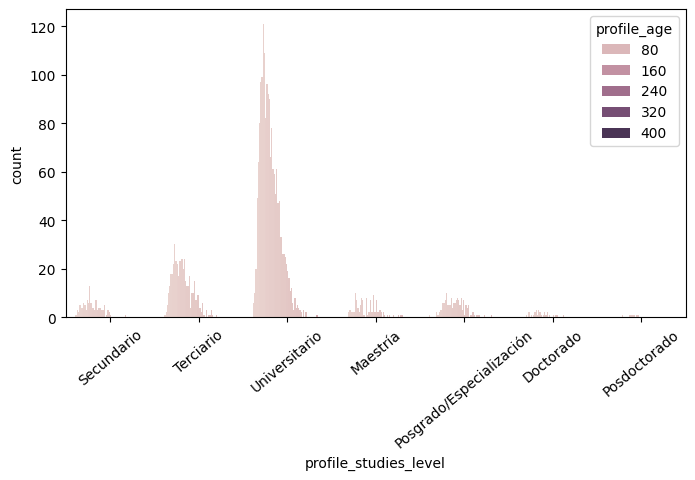

In [ ]:
fig = plt.figure(figsize=(8,4))
seaborn.countplot(x= df.profile_studies_level,  hue=df.profile_age, order=sorted_studies_levels )
plt.xticks(rotation=40)

## Varias numéricas

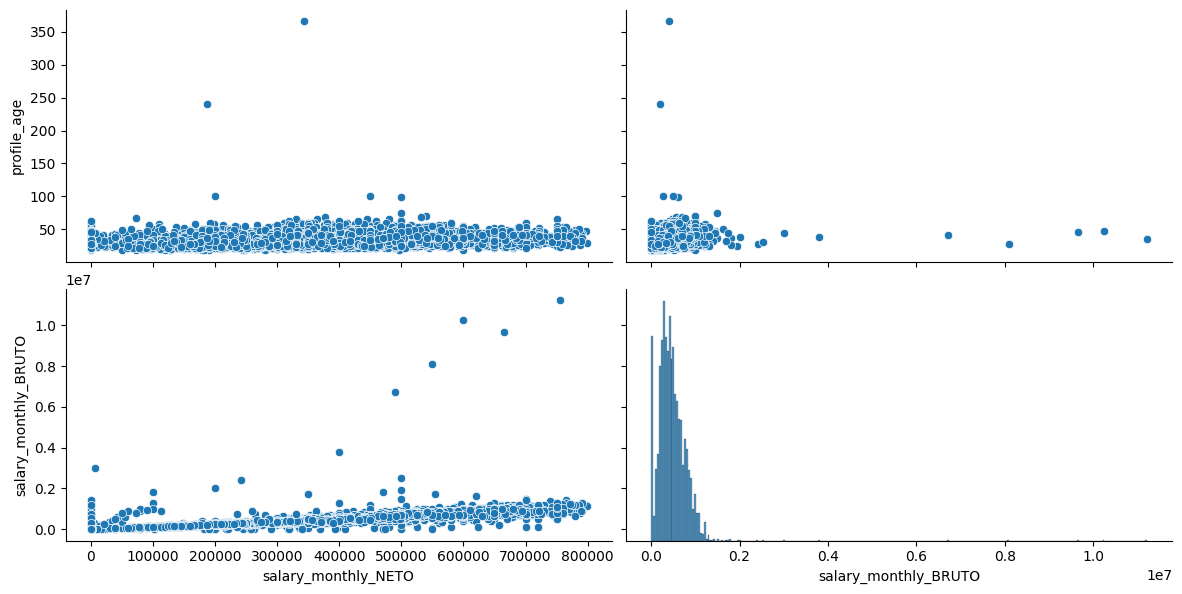

In [ ]:
max_sal = 800000
seaborn.pairplot(data=df[df.salary_monthly_NETO < max_sal],
                 y_vars=['profile_age', 'salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO', 'salary_monthly_BRUTO'],
                 aspect=2, height=3)

<Figure size 800x400 with 0 Axes>

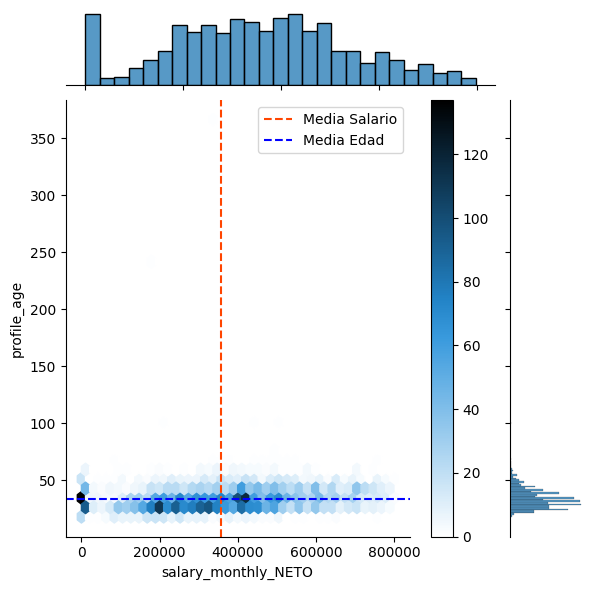

In [ ]:
fig = plt.figure(figsize=(8,4))
seaborn.jointplot(data=df[df.salary_monthly_NETO < max_sal], x='salary_monthly_NETO',
                  y='profile_age', kind='hex', height=6)
plt.axvline(df[df.salary_monthly_NETO < max_sal]['salary_monthly_NETO'].mean(), color='orangered',
            linestyle='--', label='Media Salario')
plt.axhline(df[df.salary_monthly_NETO < max_sal]['profile_age'].mean(), color='blue',
            linestyle='--', label='Media Edad')
plt.legend()
plt.colorbar()
# Remove scietific notation
plt.ticklabel_format(style='plain', axis='y')

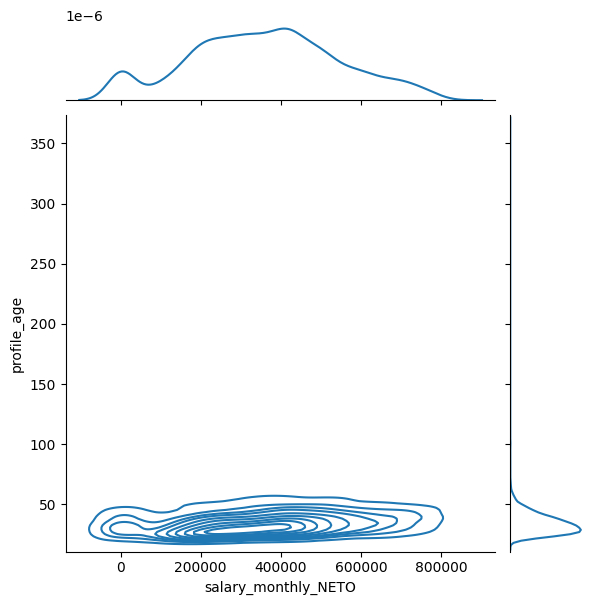

In [ ]:
seaborn.jointplot(data=df[df.salary_monthly_NETO < max_sal], x='salary_monthly_NETO',
                  y='profile_age', kind='kde', height=6)
# Remove scietific notation
plt.ticklabel_format(style='plain', axis='y')

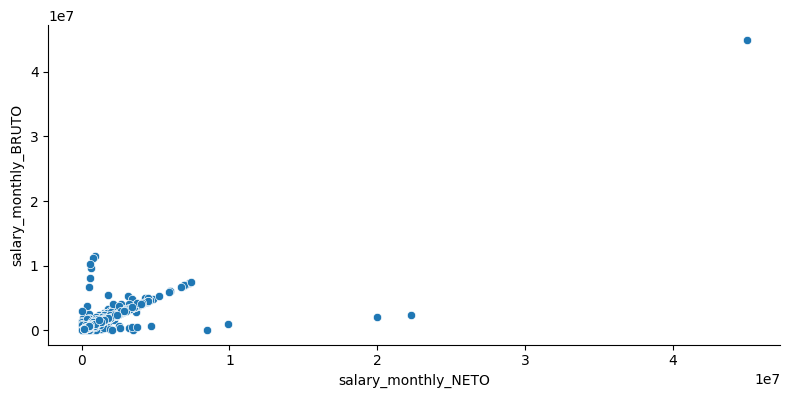

In [ ]:
seaborn.pairplot(data=df, y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=4)

**Pregunta** ¿Cuáles le parece que son las ventajas de ver de a dos  (o más) variables simultáneamente?

## Mixtas

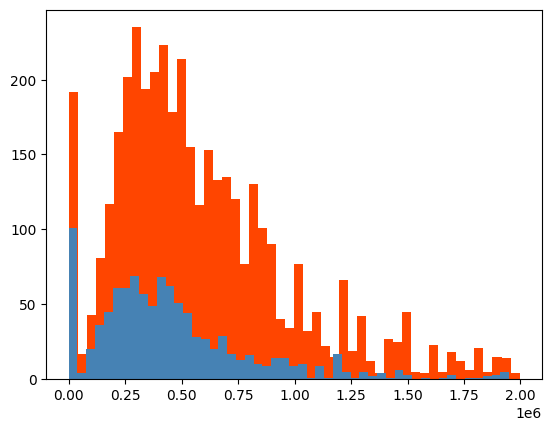

In [ ]:
filtered_df= df[df[salary_col] < 2000000] #mirar como cambia filtrando por valores menores...
df_H= filtered_df[ filtered_df['profile_g']=='Varón cis']
df_M=filtered_df[ filtered_df['profile_g']=='Mujer cis']

plt.hist(df_H[salary_col], color='orangered', bins=50)
plt.hist(df_M[salary_col], color='steelblue', bins=50) #aca importa el orden, cuidado con la superposición
plt.show()


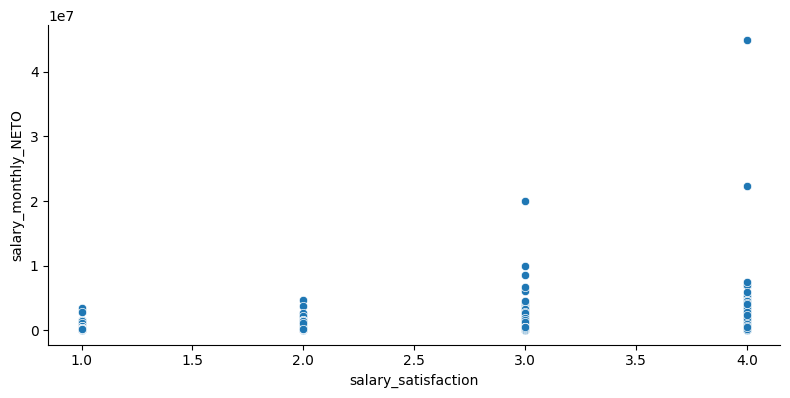

In [ ]:
max_age=99
seaborn.pairplot(data=df[df.profile_age < max_age], y_vars=['salary_monthly_NETO'],
                 x_vars=['salary_satisfaction'],
                 aspect=2, height=4)

Una desventaja de usar un pairplot para variables categóricas es la superposición de los puntos que tienen el mismo valor. Un gráfico que soluciona este problema es el `catplot`

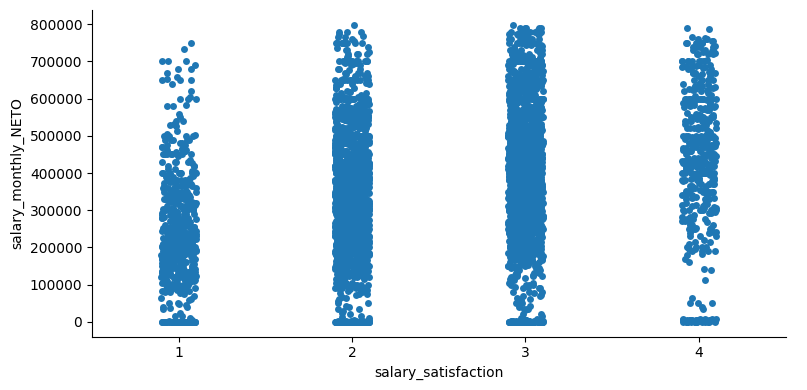

In [ ]:
seaborn.catplot(data=df[df.salary_monthly_NETO < max_sal], y='salary_monthly_NETO',  #probar también con profile_age, 'profile_gender'
                x='salary_satisfaction', height=4, aspect=2)

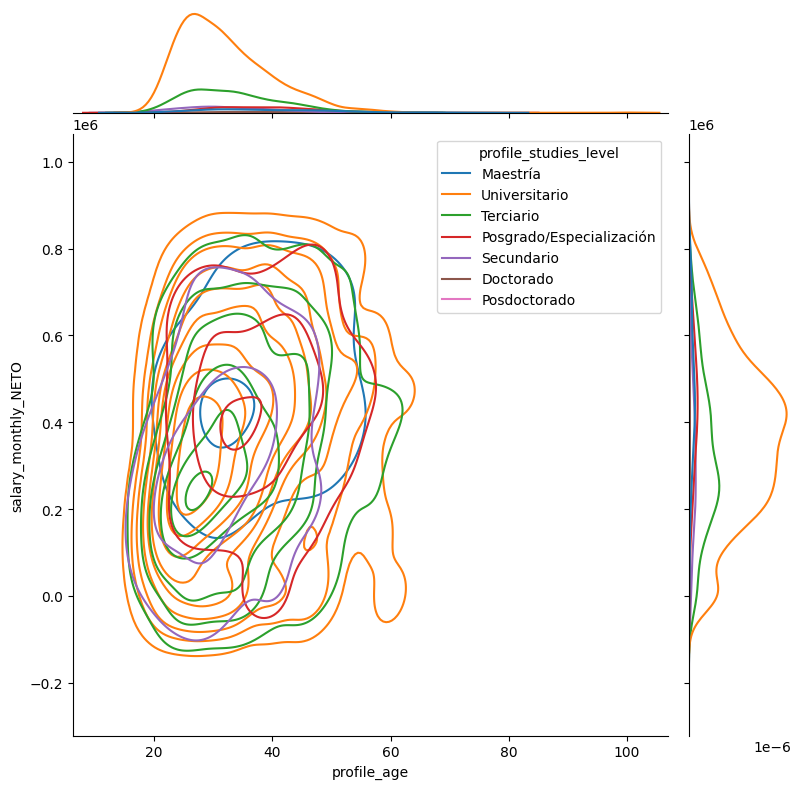

In [ ]:
seaborn.jointplot(data=df[df.salary_monthly_NETO < max_sal], x='profile_age',
                  y='salary_monthly_NETO', hue='profile_studies_level',
                  kind='kde', height=8)

Distribucion (con boxplot) condicional

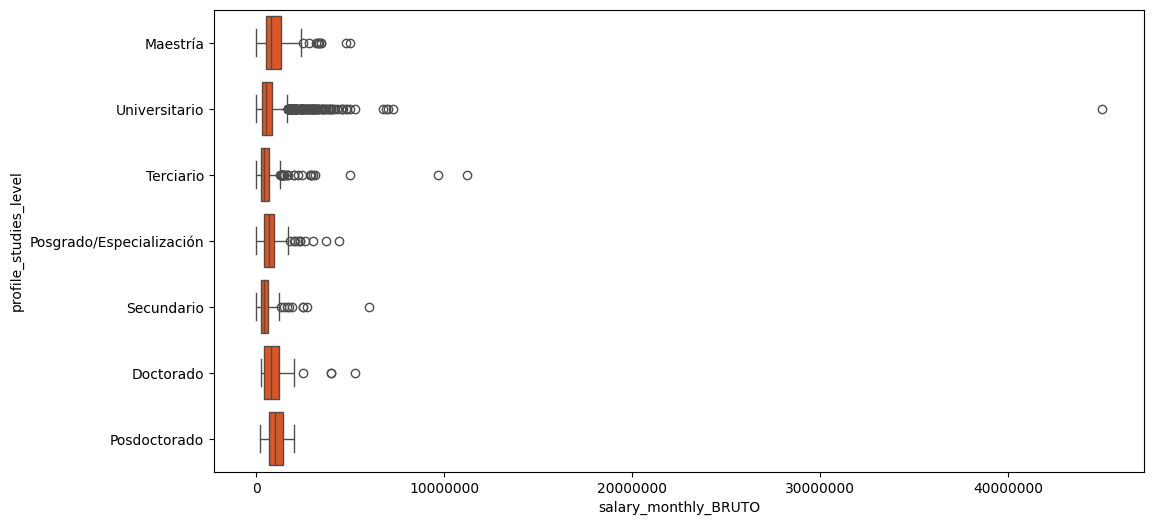

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

# Práctico para resolver en clase

1. Analice las variables `'salary_monthly_BRUTO'` (salario mensual Bruto) y `'salary_monthly_NETO'` (salario Neto) en conjunto, que comentarios puede hacer al respecto?


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000., 1600000.]),
 [Text(-200000.0, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(200000.0, 0, '0.2'),
  Text(400000.0, 0, '0.4'),
  Text(600000.0, 0, '0.6'),
  Text(800000.0, 0, '0.8'),
  Text(1000000.0, 0, '1.0'),
  Text(1200000.0, 0, '1.2'),
  Text(1400000.0, 0, '1.4'),
  Text(1600000.0, 0, '1.6')])

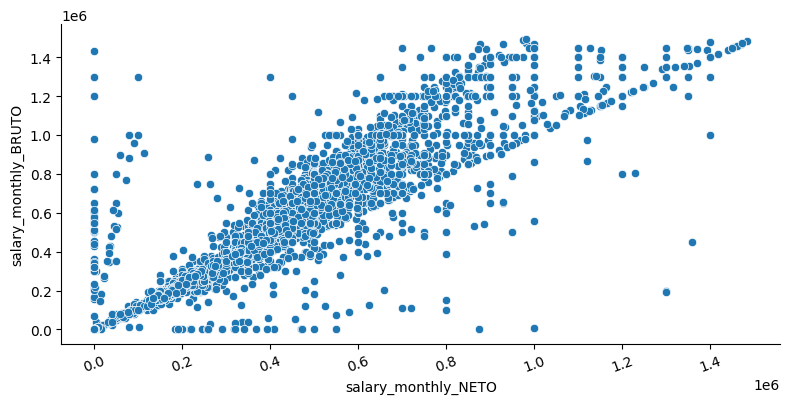

In [ ]:
import numpy as np
df_limpio=df[(df.salary_monthly_BRUTO <1500000)& (df.salary_monthly_NETO <1500000)]
seaborn.pairplot(data=df_limpio, y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=4)
plt.xticks(rotation=20)


2. Generamos una nueva columna `'salary_monthly_DESCUENTOS'= 'salary_monthly_BRUTO'-'salary_monthly_NETO'`, es decir que contenga los descuentos mensuales.
3. Analice la distribución de esta columna de datos gráficamente.

In [ ]:
df_limpio['salary_monthly_DESCUENTOS']=df_limpio.salary_monthly_BRUTO-df_limpio.salary_monthly_NETO #generamos una nueva columna
#print(df_limpio.loc[0:2,'salary_monthly_BRUTO']), print(df_limpio.loc[0:2,'salary_monthly_NETO'])
#print(df_limpio['salary_monthly_DESCUENTOS'][0:2])
df_limpio[0:3] #mire la última columna

<ipython-input-56-d890a48bb410>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['salary_monthly_DESCUENTOS']=df_limpio.salary_monthly_BRUTO-df_limpio.salary_monthly_NETO #generamos una nueva columna


,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender,profile_g,salary_monthly_DESCUENTOS
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis,Varón cis,160000.0
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,NaN,No,No recibo bono,...,Universidad Siglo 21,Terminar encuesta,NaN,NaN,NaN,NaN,45,Varón Cis,Varón cis,130000.0
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis,Mujer cis,21000.0


In [ ]:
df_limpio['salary_monthly_DESCUENTOS'].mean()

106054.49348340217

In [ ]:
df_limpio['salary_monthly_DESCUENTOS'].min()

-1108000.0

<Axes: xlabel='salary_monthly_DESCUENTOS', ylabel='Count'>

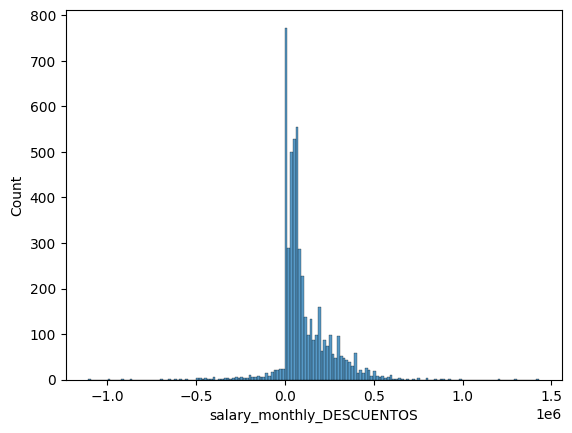

In [ ]:
seaborn.histplot(df_limpio['salary_monthly_DESCUENTOS'])

Interpretemos correlación entre las columnas de sueldos

-Calcular las medias (ambas columnas)

-Hacer el grafico que corresponda

In [ ]:
matcov=np.cov(df_limpio.salary_monthly_BRUTO,df_limpio.salary_monthly_NETO)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corr=np.corrcoef(df_limpio.salary_monthly_BRUTO,df_limpio.salary_monthly_NETO)
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')

#df_limpio.salary_monthly_BRUTO.describe().apply(lambda s: '{0:.2f}'.format(s))
#df_limpio.salary_monthly_NETO.describe().apply(lambda s: '{0:.2f}'.format(s))

matriz de varianza covarianza: 
 [[1.04426834e+11 7.21087320e+10]
 [7.21087320e+10 6.17617624e+10]] 

matriz de correlaciones: 
  [[1.         0.89788758]
 [0.89788758 1.        ]] 

correlación entra ambas variables:  0.89788757623711 

